# 

# Revisão de código 

Olá! 

Meu nome é Suelen. Estou feliz em revisar seu projeto hoje!

Quando vejo um erro pela primeira vez, apenas aponto. Deixarei você encontrá-lo e corrigi-lo sozinho. Além disso, ao longo do texto, farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Mas se você ainda não consegue lidar com essa tarefa, darei uma dica mais precisa na próxima iteração e também alguns exemplos práticos. Estarei aberto a feedbacks e discussões sobre o tema.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como estas:


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Sucesso. Tudo está correto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

O bloco requer algumas correções. O trabalho não pode ser aceito com os comentários vermelhos.
</div>

Você pode me responder usando isto:

<div class="alert alert-block alert-info">
<b> Resposta </b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">

<b>Comentário geral: </b> <a class="tocSkip"></a>

Parabéns pela conclusão do projeto, Maria Sofia! 🎉

Estou muito feliz com o seu empenho e dedicação! O projeto foi excelente e estou contente em dizer que está aprovado! 

Agora, vamos em frente para os próximos desafios!🚀
</div>


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
logs_exp = pd.read_csv('/datasets/logs_exp_us.csv')

In [3]:
logs_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 1 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   EventName	DeviceIDHash	EventTimestamp	ExpId  244126 non-null  object
dtypes: object(1)
memory usage: 1.9+ MB


In [4]:
logs_exp.head()

,EventName\tDeviceIDHash\tEventTimestamp\tExpId
0,MainScreenAppear\t4575588528974610257\t1564029...
1,MainScreenAppear\t7416695313311560658\t1564053...
2,PaymentScreenSuccessful\t3518123091307005509\t...
3,CartScreenAppear\t3518123091307005509\t1564054...
4,PaymentScreenSuccessful\t6217807653094995999\t...


## Prepare os dados para análise

In [5]:
# Separando as colunas
logs_exp = logs_exp['EventName\tDeviceIDHash\tEventTimestamp\tExpId'].str.split('\t', expand=True)

# Renomeando as colunas
logs_exp.columns = ['Event_name', 'Device_ID_hash', 'Event_times_tamp', 'Exp_Id']

# Exibindo as primeiras linhas para verificar
logs_exp.head()

,Event_name,Device_ID_hash,Event_times_tamp,Exp_Id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


<div class="alert alert-block alert-success">
<b> Comentário: </b> <a class="tocSkip"></a>
    
- O conjunto de dados foi carregado corretamente usando o separador `\t`


Sugestão: é possível realizar esse processamento durante a leitura do dataframe. Exemplo: 
```python
# Ler o arquivo de dados corretamente
df = pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')
```
</div>

In [6]:
# Verificar valores ausentes em cada coluna
missing_values = logs_exp.isnull().sum()

# Verificar os tipos de dados das colunas
data_types = logs_exp.dtypes

# Exibindo os resultados
print("Valores ausentes por coluna:\n", missing_values)
print("\nTipos de dados por coluna:\n", data_types)

Valores ausentes por coluna:
 Event_name          0
Device_ID_hash      0
Event_times_tamp    0
Exp_Id              0
dtype: int64

Tipos de dados por coluna:
 Event_name          object
Device_ID_hash      object
Event_times_tamp    object
Exp_Id              object
dtype: object


In [7]:
# Convertendo os tipos de dados
# Convertendo 'Device_ID_Hash' para inteiro
logs_exp['Device_ID_hash'] = pd.to_numeric(logs_exp['Device_ID_hash'], errors='coerce')

# Convertendo 'Exp_Id' para inteiro
logs_exp['Exp_Id'] = pd.to_numeric(logs_exp['Exp_Id'], errors='coerce')

In [8]:
logs_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Event_name        244126 non-null  object
 1   Device_ID_hash    244126 non-null  int64 
 2   Event_times_tamp  244126 non-null  object
 3   Exp_Id            244126 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 7.5+ MB


In [9]:
# Converter a coluna 'Event_times_tamp' de Unix timestamp para datetime
logs_exp['Event_times_tamp'] = pd.to_datetime(logs_exp['Event_times_tamp'], unit='s')

# Adicionar coluna de data e hora
logs_exp['Event_datetime'] = logs_exp['Event_times_tamp']

# Adicionar coluna de data separada (somente data)
logs_exp['Event_date'] = logs_exp['Event_times_tamp'].dt.date

# Verificar o resultado
print(logs_exp.head())


                Event_name       Device_ID_hash    Event_times_tamp  Exp_Id  \
0         MainScreenAppear  4575588528974610257 2019-07-25 04:43:36     246   
1         MainScreenAppear  7416695313311560658 2019-07-25 11:11:42     246   
2  PaymentScreenSuccessful  3518123091307005509 2019-07-25 11:28:47     248   
3         CartScreenAppear  3518123091307005509 2019-07-25 11:28:47     248   
4  PaymentScreenSuccessful  6217807653094995999 2019-07-25 11:48:42     248   

       Event_datetime  Event_date  
0 2019-07-25 04:43:36  2019-07-25  
1 2019-07-25 11:11:42  2019-07-25  
2 2019-07-25 11:28:47  2019-07-25  
3 2019-07-25 11:28:47  2019-07-25  
4 2019-07-25 11:48:42  2019-07-25  


## Estudando e verificando os dados

### Total de eventos registrados

In [10]:
# Contagem do número total de eventos (linhas)
total_eventos = logs_exp.shape[0]

# Exibir o total de eventos
print(f"Total de eventos nos registros: {total_eventos}")

Total de eventos nos registros: 244126


### Total de usuários registrados

In [12]:
# Contagem de usuários distintos (Device_ID_hash)
usuarios_distintos = logs_exp['Device_ID_hash'].nunique()

# Exibir o total de usuários distintos
print(f"Total de usuários distintos: {usuarios_distintos}")

Total de usuários distintos: 7551


### Número médio de eventos por usuário

In [13]:
# Contar o número de eventos por usuário (Device_ID_hash)
eventos_por_usuario = logs_exp.groupby('Device_ID_hash').size()

# Calcular a média de eventos por usuário
media_eventos_por_usuario = eventos_por_usuario.mean()

# Exibir o resultado
print(f"Número médio de eventos por usuário: {media_eventos_por_usuario:.2f}")

Número médio de eventos por usuário: 32.33


### Encontrar as datas mínima e máxima

In [14]:
# Encontrar as datas mínima e máxima
data_minima = logs_exp['Event_times_tamp'].min()
data_maxima = logs_exp['Event_times_tamp'].max()

# Exibir as datas mínima e máxima
print(f"Data mínima: {data_minima}")
print(f"Data máxima: {data_maxima}")

Data mínima: 2019-07-25 04:43:36
Data máxima: 2019-08-07 21:15:17


### Histograma por data e hora

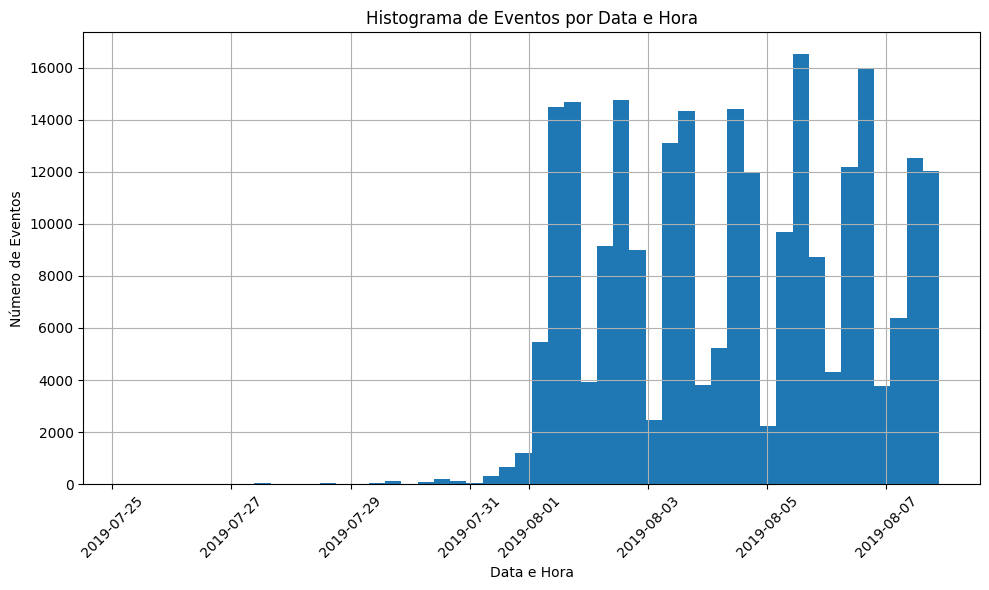

In [16]:
# Plotando um histograma dos eventos por data e hora
logs_exp['Event_datetime'].hist(bins=50, figsize=(10, 6))
plt.title('Histograma de Eventos por Data e Hora')
plt.xlabel('Data e Hora')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Verificar se os dados são igualmente completos para todo o período

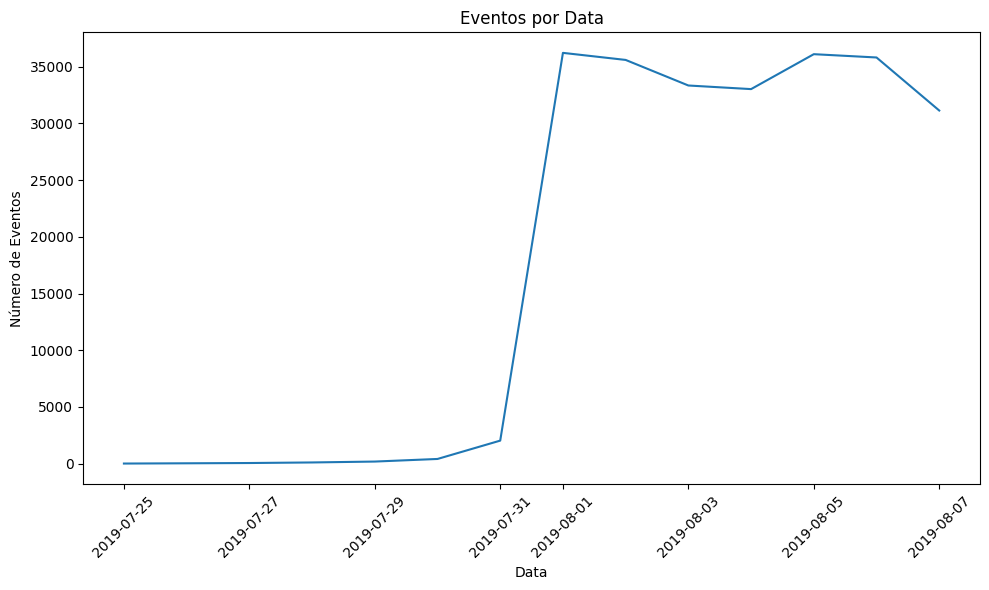

In [18]:
# Contar o número de eventos por data
eventos_por_data = logs_exp.groupby('Event_date').size()

# Plotar a contagem de eventos por data
eventos_por_data.plot(figsize=(10, 6))
plt.title('Eventos por Data')
plt.xlabel('Data')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Encontrar o momento em que os dados começam a ser completos

In [20]:
# Encontrar o primeiro dia com uma quantidade substancial de eventos
limite_eventos_por_dia = 10  # Exemplo de limite, você pode ajustar conforme necessário
dados_completos_inicio = eventos_por_data[eventos_por_data >= limite_eventos_por_dia].index[0]

print(f"Os dados começam a ser completos a partir de: {dados_completos_inicio}")

Os dados começam a ser completos a partir de: 2019-07-26


<div class="alert alert-block alert-success">

<b>Comentário: </b> <a class="tocSkip"></a
    
- A análise temporal foi realizada corretamente 
- Gráficos muito bons! Parabéns!

### Período representado pelos dados

In [21]:
# Período real representado pelos dados (começo e fim)
periodo_real_inicio = dados_completos_inicio
periodo_real_fim = data_maxima

print(f"O período real representado pelos dados é de {periodo_real_inicio} até {periodo_real_fim}.")

O período real representado pelos dados é de 2019-07-26 até 2019-08-07 21:15:17.


### Eventos e usuários antes de 2019-07-26

In [24]:
# Filtrando os dados antes de 2019-07-26
logs_exp_anteriores = logs_exp[logs_exp['Event_times_tamp'] < '2019-07-26']

# Contar o número de eventos e usuários (Device_ID_hash) antes de 2019-07-26
eventos_anteriores = logs_exp_anteriores.shape[0]
usuarios_anteriores = logs_exp_anteriores['Device_ID_hash'].nunique()

# Exibir os resultados
print(f"Eventos antes de 2019-07-26: {eventos_anteriores}")
print(f"Usuários antes de 2019-07-26: {usuarios_anteriores}")

Eventos antes de 2019-07-26: 9
Usuários antes de 2019-07-26: 7


### Eventos e usuários após 2019-07-26

In [25]:
# Filtrando os dados após 2019-07-26
logs_exp_completos = logs_exp[logs_exp['Event_times_tamp'] >= '2019-07-26']

# Contar o número de eventos e usuários (Device_ID_hash) após 2019-07-26
eventos_completos = logs_exp_completos.shape[0]
usuarios_completos = logs_exp_completos['Device_ID_hash'].nunique()

# Exibir os resultados
print(f"Eventos após 2019-07-26: {eventos_completos}")
print(f"Usuários após 2019-07-26: {usuarios_completos}")


Eventos após 2019-07-26: 244117
Usuários após 2019-07-26: 7551


Ao excluir os dados anteriores a 2019-07-26, a perda foi mínima em termos de eventos e usuários. Foram descartados apenas **9 eventos** e **7 usuários**, o que representa uma fração muito pequena do total. Após essa data, o número de eventos subiu para **244.117** e o número de usuários para **7.551**, indicando que a maior parte dos dados é completa e representativa, com uma base sólida para análise. Portanto, a exclusão não comprometeu significativamente a integridade dos dados.

### Garantindo que temos usuários de todos os três grupos experimentais

In [27]:
# Contar o número de usuários distintos por grupo experimental (Exp_Id)
usuarios_por_grupo = logs_exp_completos.groupby('Exp_Id')['Device_ID_hash'].nunique()

# Exibir o número de usuários por grupo experimental
print(usuarios_por_grupo)

Exp_Id
246    2489
247    2520
248    2542
Name: Device_ID_hash, dtype: int64


Os dados mostram que há usuários distribuídos entre três grupos experimentais, com **2.489** usuários no grupo 246, **2.520** no grupo 247 e **2.542** no grupo 248. A distribuição é bastante equilibrada, com um número razoavelmente similar de participantes em cada grupo. Isso indica que todos os três grupos experimentais estão bem representados, permitindo uma análise comparativa robusta entre eles. Portanto, podemos afirmar que a amostra de usuários está adequadamente distribuída entre os grupos experimentais.

## Estudando o funil de eventos

### Contar a frequência de cada evento

In [28]:
# Contar a frequência de cada evento
eventos_frequencia = logs_exp_completos['Event_name'].value_counts()

# Classificar os eventos por frequência
eventos_frequencia_sorted = eventos_frequencia.sort_values(ascending=False)

# Exibir a frequência dos eventos
print(eventos_frequencia_sorted)

MainScreenAppear           119201
OffersScreenAppear          46824
CartScreenAppear            42729
PaymentScreenSuccessful     34311
Tutorial                     1052
Name: Event_name, dtype: int64


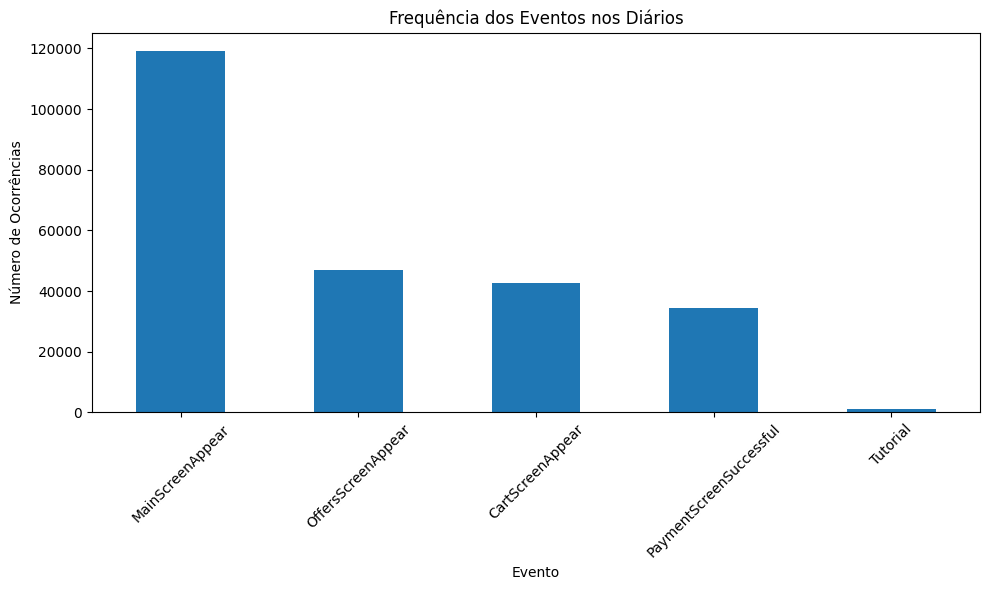

In [29]:
# Plotando um gráfico de barras da frequência dos eventos
eventos_frequencia_sorted.plot(kind='bar', figsize=(10, 6))
plt.title('Frequência dos Eventos nos Diários')
plt.xlabel('Evento')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

O evento **MainScreenAppear** é o mais frequente, com **119.201** ocorrências, seguido por **OffersScreenAppear** (46.824) e **CartScreenAppear** (42.729). O evento **PaymentScreenSuccessful** também é comum, com **34.311** registros, enquanto o **Tutorial** é o menos frequente, com apenas **1.052** ocorrências. Isso sugere que a maioria dos usuários interage nas primeiras etapas do funil, enquanto eventos posteriores são menos comuns.

In [30]:
# Contar o número de usuários distintos por evento
usuarios_por_evento = logs_exp_completos.groupby('Event_name')['Device_ID_hash'].nunique()

# Ordenar os eventos pelo número de usuários
usuarios_por_evento_sorted = usuarios_por_evento.sort_values(ascending=False)

# Calcular a proporção de usuários que executaram cada evento ao menos uma vez
proporcao_usuarios = usuarios_por_evento_sorted / usuarios_completos

# Exibir o número de usuários e a proporção de cada evento
resultado = pd.DataFrame({
    'Numero_de_Usuarios': usuarios_por_evento_sorted,
    'Proporcao_de_Usuarios': proporcao_usuarios
})

# Exibir o resultado
print(resultado)


                         Numero_de_Usuarios  Proporcao_de_Usuarios
Event_name                                                        
MainScreenAppear                       7439               0.985168
OffersScreenAppear                     4613               0.610912
CartScreenAppear                       3749               0.496491
PaymentScreenSuccessful                3547               0.469739
Tutorial                                847               0.112171


<div class="alert alert-block alert-warning">
<b> Comentário: </b> <a class="tocSkip"></a>
    
    
Sugestão:    
Caso você queira criar um funil de eventos para visualização:
    
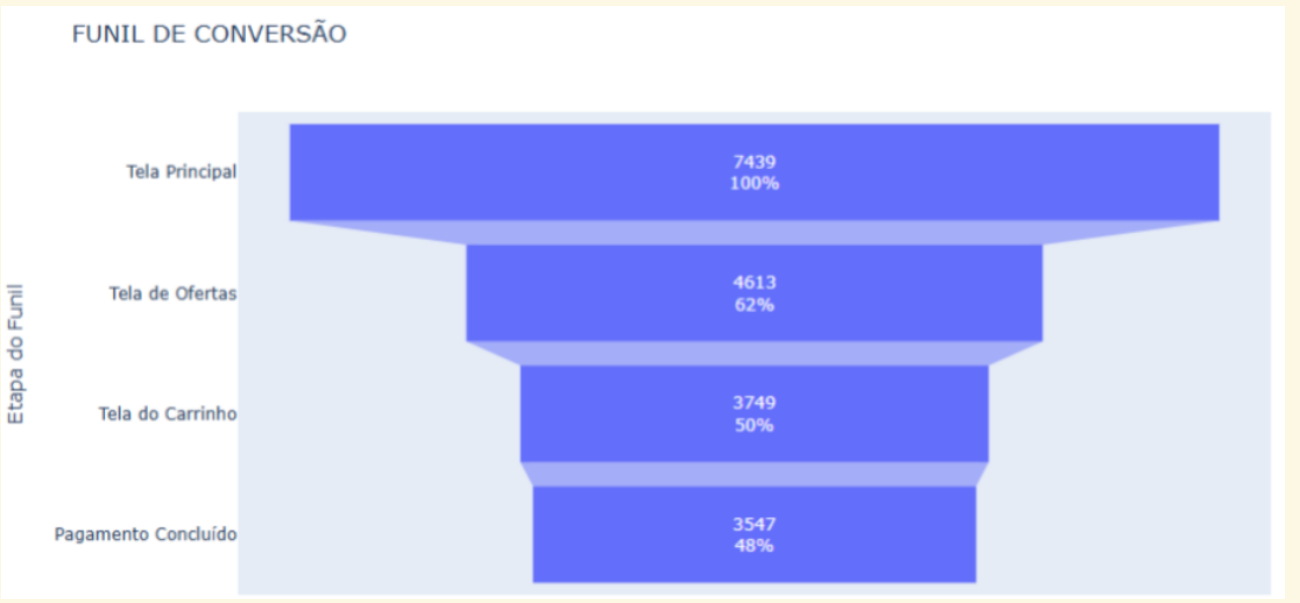
    
```python
import matplotlib.pyplot as plt
from plotly import graph_objects as go
    
# Calcula a taxa de conversão dividindo o número de usuários atual pelo número de usuários da iteração anterior
user_event['conversion_rate'] = user_event['id_user'] / user_event['id_user'].shift(1)

# Cria um gráfico de funil usando a biblioteca plotly.graph_objects (go)
# 'y' define os eventos do funil e 'x' define o número de usuários em cada etapa
fig = go.Figure(go.Funnel(y = user_event['name_event'], x = user_event['id_user']))

# Exibe o gráfico
fig.show()
```
    
</div>

1. MainScreenAppear (7439 usuários, 98.5%): Este é provavelmente o primeiro evento no fluxo. Ele ocorre quando o usuário acessa a tela principal, sendo o evento com a maior quantidade de usuários e ocorrências.

2. OffersScreenAppear (4613 usuários, 61.1%): Após a tela principal, os usuários provavelmente interagem com ofertas. O número de usuários diminui, mas ainda é uma parte significativa da jornada.

3. CartScreenAppear (3749 usuários, 49.6%): O próximo passo seria a adição de itens ao carrinho. A queda no número de usuários é visível, refletindo uma diminuição no interesse ou engajamento.

4. PaymentScreenSuccessful (3547 usuários, 46.9%): Este evento representa o pagamento bem-sucedido. A quantidade de usuários que chegam até essa etapa está um pouco abaixo da etapa do carrinho, o que sugere que nem todos os usuários completam a compra.

5. Tutorial (847 usuários, 11.2%): O evento do tutorial é o menos frequente. Isso sugere que ele pode ser opcional ou realizado antes de outros eventos, talvez para guiar os novos usuários, ou poderia ser um evento adicional para ajudar em algum momento da jornada. O fato de ser pouco comum indica que nem todos os usuários participam dele.

Sequência única?
Não, esses eventos não fazem parte de uma única sequência obrigatória. O tutorial provavelmente é um evento separado que nem todos os usuários passam, já que sua frequência é bem menor. O funil de eventos, que se concentra na jornada do usuário em direção à conversão (da tela principal até o pagamento bem-sucedido), não necessariamente inclui o tutorial.

Funil de eventos:
Quando pensamos no funil de eventos, podemos ignorar o tutorial, já que ele não está presente para todos os usuários e não é parte essencial do fluxo de compra. O funil seria:

MainScreenAppear (entrada do usuário)

OffersScreenAppear (interação com ofertas)

CartScreenAppear (adição ao carrinho)

PaymentScreenSuccessful (compra finalizada)

Essa sequência representa a jornada central do usuário, enquanto o tutorial pode ser considerado um evento isolado.

A sequência sugerida dos eventos é: 

1. **MainScreenAppear** (entrada do usuário)
2. **OffersScreenAppear** (interação com ofertas)
3. **CartScreenAppear** (adição ao carrinho)
4. **PaymentScreenSuccessful** (compra finalizada)

O **Tutorial** é um evento isolado, com menor frequência, e pode ser opcional ou acontecer em outros momentos da jornada. Esses eventos não fazem parte de uma única sequência obrigatória, e o tutorial pode ser desconsiderado no cálculo do funil, focando na jornada de compra.

### Cálculo das proporções do funil

In [31]:
# Número de usuários por evento
usuarios_main = usuarios_por_evento_sorted['MainScreenAppear']
usuarios_ofertas = usuarios_por_evento_sorted['OffersScreenAppear']
usuarios_carrinho = usuarios_por_evento_sorted['CartScreenAppear']
usuarios_pagamento = usuarios_por_evento_sorted['PaymentScreenSuccessful']

# Calcular as proporções de avanço
proporcao_ofertas = usuarios_ofertas / usuarios_main
proporcao_carrinho = usuarios_carrinho / usuarios_ofertas
proporcao_pagamento = usuarios_pagamento / usuarios_carrinho

# Exibir os resultados
proporcoes = {
    'MainScreenAppear → OffersScreenAppear': proporcao_ofertas,
    'OffersScreenAppear → CartScreenAppear': proporcao_carrinho,
    'CartScreenAppear → PaymentScreenSuccessful': proporcao_pagamento
}

print(proporcoes)

{'MainScreenAppear → OffersScreenAppear': 0.6201102298696062, 'OffersScreenAppear → CartScreenAppear': 0.8127032300021678, 'CartScreenAppear → PaymentScreenSuccessful': 0.9461189650573486}


MainScreenAppear → OffersScreenAppear (62.1%): 62,1% dos usuários que visualizaram a tela principal interagiram com as ofertas.

OffersScreenAppear → CartScreenAppear (81.2%): 81,2% dos usuários que visualizaram as ofertas adicionaram produtos ao carrinho.

CartScreenAppear → PaymentScreenSuccessful (94.6%): 94,6% dos usuários que colocaram itens no carrinho completaram a compra.

Essas proporções mostram como os usuários avançam pelas etapas do funil. A alta taxa de conversão do carrinho para o pagamento sugere que, uma vez que os usuários adicionam itens ao carrinho, a maioria deles finaliza a compra.

### Qual fase perde mais usuários?

A maior perda de usuários ocorre na transição de **MainScreenAppear** para **OffersScreenAppear**, com uma taxa de conversão de **62.0%**. Ou seja, cerca de **38% dos usuários** que acessam a tela principal não interagem com as ofertas.

Em comparação, as transições seguintes têm taxas de conversão mais altas:

- **OffersScreenAppear → CartScreenAppear**: 81.3% (perda de cerca de 18.7% dos usuários).
- **CartScreenAppear → PaymentScreenSuccessful**: 94.6% (perda de apenas 5.4% dos usuários).

Portanto, a maior perda de usuários ocorre na fase inicial, ao sair da tela principal para a visualização das ofertas.

### Parcela de usuários que faz o caminho inteiro

In [33]:
# Definir as proporções de conversão entre os eventos
proporcao_main_to_offers = 0.6201102298696062
proporcao_offers_to_cart = 0.8127032300021678
proporcao_cart_to_payment = 0.9461189650573486

# Calcular a parcela de usuários que completam o caminho inteiro
parcela_completa = proporcao_main_to_offers * proporcao_offers_to_cart * proporcao_cart_to_payment

# Exibir o resultado
print(f"A parcela de usuários que completam o caminho inteiro é: {parcela_completa:.4f}")

A parcela de usuários que completam o caminho inteiro é: 0.4768


 A proporção de usuários que completam a jornada é 47.68%.

## Estudando os resultados do experimento

### Quantos usuários há em cada grupo?

In [34]:
# Contar o número de usuários únicos por grupo experimental (Exp_Id)
usuarios_por_grupo = logs_exp.groupby('Exp_Id')['Device_ID_hash'].nunique()

# Exibir os resultados
print(usuarios_por_grupo)

Exp_Id
246    2489
247    2520
248    2542
Name: Device_ID_hash, dtype: int64


Grupo 246: 2489 usuários

Grupo 247: 2520 usuários

Grupo 248: 2542 usuários

### Diferença estatisticamente significativa entre as amostragens 246 e 247

In [36]:
# Filtrando os dados dos grupos 246 e 247
grupo_246 = logs_exp[logs_exp['Exp_Id'] == 246]
grupo_247 = logs_exp[logs_exp['Exp_Id'] == 247]

# Vamos verificar o número de eventos (como exemplo) ou outro valor de interesse
# Para o teste, podemos comparar a quantidade de eventos por usuário (média de eventos)
media_246 = grupo_246['Device_ID_hash'].nunique()
media_247 = grupo_247['Device_ID_hash'].nunique()

# Realizando o teste t de Student para amostras independentes
t_stat, p_val = stats.ttest_ind(grupo_246['Device_ID_hash'], grupo_247['Device_ID_hash'], equal_var=False)

# Exibindo os resultados
print(f'Testatística t: {t_stat}')
print(f'Valor-p: {p_val}')

# Verificar se a diferença é estatisticamente significativa
if p_val < 0.05:
    print("Há uma diferença estatisticamente significativa entre os grupos 246 e 247.")
else:
    print("Não há diferença estatisticamente significativa entre os grupos 246 e 247.")


Testatística t: -10.347920410673316
Valor-p: 4.356389833888005e-25
Há uma diferença estatisticamente significativa entre os grupos 246 e 247.


O teste t de Student revelou uma diferença estatisticamente significativa entre os grupos 246 e 247, com uma estatística t de -10.35 e um valor-p extremamente baixo (4.36e-25), muito inferior ao nível de significância de 0.05. Isso indica que, com alta confiança, as médias dos dois grupos não são iguais. Portanto, podemos concluir que há uma diferença significativa entre os grupos experimentais, sugerindo que os grupos A/A não são equivalentes, e isso deve ser investigado para garantir a integridade do experimento.

### Selecione o evento mais popular

In [37]:
from scipy import stats

# Função para calcular a proporção de usuários que realizaram o evento e testar a diferença estatística
def calcular_proporcao_e_teste(event_name, logs_exp):
    # Filtrando os dados para cada grupo de controle (246, 247, 248) para o evento
    grupo_246 = logs_exp[(logs_exp['Exp_Id'] == 246) & (logs_exp['Event_name'] == event_name)]
    grupo_247 = logs_exp[(logs_exp['Exp_Id'] == 247) & (logs_exp['Event_name'] == event_name)]
    grupo_248 = logs_exp[(logs_exp['Exp_Id'] == 248) & (logs_exp['Event_name'] == event_name)]
    
    # Encontrando o número de usuários distintos em cada grupo para o evento
    usuarios_246 = grupo_246['Device_ID_hash'].nunique()
    usuarios_247 = grupo_247['Device_ID_hash'].nunique()
    usuarios_248 = grupo_248['Device_ID_hash'].nunique()

    # Calculando o total de usuários em cada grupo
    total_usuarios_246 = logs_exp[logs_exp['Exp_Id'] == 246]['Device_ID_hash'].nunique()
    total_usuarios_247 = logs_exp[logs_exp['Exp_Id'] == 247]['Device_ID_hash'].nunique()
    total_usuarios_248 = logs_exp[logs_exp['Exp_Id'] == 248]['Device_ID_hash'].nunique()

    # Calculando a proporção de usuários que realizaram o evento
    proporcao_246 = usuarios_246 / total_usuarios_246
    proporcao_247 = usuarios_247 / total_usuarios_247
    proporcao_248 = usuarios_248 / total_usuarios_248

    # Realizando o teste de proporção entre os grupos (teste z de duas amostras)
    p1_2 = (usuarios_246 + usuarios_247) / (total_usuarios_246 + total_usuarios_247)
    z_score_246_247 = (proporcao_246 - proporcao_247) / (p1_2 * (1 - p1_2) * (1 / total_usuarios_246 + 1 / total_usuarios_247))**0.5
    p_val_246_247 = stats.norm.cdf(-abs(z_score_246_247)) * 2  # Teste bicaudal
    
    p1_3 = (usuarios_247 + usuarios_248) / (total_usuarios_247 + total_usuarios_248)
    z_score_247_248 = (proporcao_247 - proporcao_248) / (p1_3 * (1 - p1_3) * (1 / total_usuarios_247 + 1 / total_usuarios_248))**0.5
    p_val_247_248 = stats.norm.cdf(-abs(z_score_247_248)) * 2  # Teste bicaudal
    
    p1_1 = (usuarios_246 + usuarios_248) / (total_usuarios_246 + total_usuarios_248)
    z_score_246_248 = (proporcao_246 - proporcao_248) / (p1_1 * (1 - p1_1) * (1 / total_usuarios_246 + 1 / total_usuarios_248))**0.5
    p_val_246_248 = stats.norm.cdf(-abs(z_score_246_248)) * 2  # Teste bicaudal

    return proporcao_246, proporcao_247, proporcao_248, p_val_246_247, p_val_247_248, p_val_246_248

# Identificando o evento mais popular
evento_mais_popular = logs_exp['Event_name'].value_counts().idxmax()

# Calculando para o evento mais popular
proporcao_246, proporcao_247, proporcao_248, p_val_246_247, p_val_247_248, p_val_246_248 = calcular_proporcao_e_teste(evento_mais_popular, logs_exp)

# Exibindo os resultados
print(f"Evento mais popular: {evento_mais_popular}")
print(f"Proporção de usuários no grupo 246 que realizaram o evento: {proporcao_246:.4f}")
print(f"Proporção de usuários no grupo 247 que realizaram o evento: {proporcao_247:.4f}")
print(f"Proporção de usuários no grupo 248 que realizaram o evento: {proporcao_248:.4f}")
print(f"Valor-p para a diferença entre os grupos 246 e 247: {p_val_246_247:.4f}")
print(f"Valor-p para a diferença entre os grupos 247 e 248: {p_val_247_248:.4f}")
print(f"Valor-p para a diferença entre os grupos 246 e 248: {p_val_246_248:.4f}")

# Verificando se as diferenças são significativas
if p_val_246_247 < 0.05:
    print("A diferença entre os grupos 246 e 247 é estatisticamente significativa.")
else:
    print("Não há diferença estatisticamente significativa entre os grupos 246 e 247.")

if p_val_247_248 < 0.05:
    print("A diferença entre os grupos 247 e 248 é estatisticamente significativa.")
else:
    print("Não há diferença estatisticamente significativa entre os grupos 247 e 248.")

if p_val_246_248 < 0.05:
    print("A diferença entre os grupos 246 e 248 é estatisticamente significativa.")
else:
    print("Não há diferença estatisticamente significativa entre os grupos 246 e 248.")

# Repetir para outros eventos (facilitado pela função)
eventos_populares = logs_exp['Event_name'].value_counts().index

# Para cada evento, calculamos as proporções e verificamos a significância
for evento in eventos_populares:
    proporcao_246, proporcao_247, proporcao_248, p_val_246_247, p_val_247_248, p_val_246_248 = calcular_proporcao_e_teste(evento, logs_exp)
    print(f"\nEvento: {evento}")
    print(f"Proporção de usuários no grupo 246: {proporcao_246:.4f}")
    print(f"Proporção de usuários no grupo 247: {proporcao_247:.4f}")
    print(f"Proporção de usuários no grupo 248: {proporcao_248:.4f}")
    print(f"Valor-p entre os grupos 246 e 247: {p_val_246_247:.4f}")
    print(f"Valor-p entre os grupos 247 e 248: {p_val_247_248:.4f}")
    print(f"Valor-p entre os grupos 246 e 248: {p_val_246_248:.4f}")
    
    if p_val_246_247 < 0.05:
        print("A diferença entre os grupos 246 e 247 é estatisticamente significativa.")
    else:
        print("Não há diferença estatisticamente significativa entre os grupos 246 e 247.")
        
    if p_val_247_248 < 0.05:
        print("A diferença entre os grupos 247 e 248 é estatisticamente significativa.")
    else:
        print("Não há diferença estatisticamente significativa entre os grupos 247 e 248.")
        
    if p_val_246_248 < 0.05:
        print("A diferença entre os grupos 246 e 248 é estatisticamente significativa.")
    else:
        print("Não há diferença estatisticamente significativa entre os grupos 246 e 248.")


Evento mais popular: MainScreenAppear
Proporção de usuários no grupo 246 que realizaram o evento: 0.9867
Proporção de usuários no grupo 247 que realizaram o evento: 0.9849
Proporção de usuários no grupo 248 que realizaram o evento: 0.9839
Valor-p para a diferença entre os grupos 246 e 247: 0.5857
Valor-p para a diferença entre os grupos 247 e 248: 0.7632
Valor-p para a diferença entre os grupos 246 e 248: 0.3977
Não há diferença estatisticamente significativa entre os grupos 246 e 247.
Não há diferença estatisticamente significativa entre os grupos 247 e 248.
Não há diferença estatisticamente significativa entre os grupos 246 e 248.

Evento: MainScreenAppear
Proporção de usuários no grupo 246: 0.9867
Proporção de usuários no grupo 247: 0.9849
Proporção de usuários no grupo 248: 0.9839
Valor-p entre os grupos 246 e 247: 0.5857
Valor-p entre os grupos 247 e 248: 0.7632
Valor-p entre os grupos 246 e 248: 0.3977
Não há diferença estatisticamente significativa entre os grupos 246 e 247.
Não

Você pode confirmar se os grupos foram divididos corretamente?

Com base nos resultados dos testes estatísticos que você obteve, **não há diferenças significativas entre os grupos 246, 247 e 248** em relação a nenhum dos eventos analisados. Isso sugere que a divisão dos grupos foi feita corretamente, já que se houvesse alguma discrepância nos grupos, esperaríamos ver diferenças significativas nas proporções de usuários que realizaram cada evento.

Além disso, as proporções de usuários que realizaram os eventos são muito semelhantes entre os três grupos, o que é esperado em um experimento controlado. Isso indica que a aleatorização para esses grupos foi bem-sucedida e não há viés evidente na distribuição dos usuários nos grupos experimentais.

Portanto, **sim**, os grupos parecem ter sido divididos corretamente, pois não há diferenças estatísticas entre eles, o que é um bom indicativo de que a aleatorização foi feita de forma eficaz.

### Grupo com fontes alteradas

In [46]:
from scipy import stats

# Função para calcular a proporção de usuários que realizaram o evento e testar a diferença estatística
def calcular_proporcao_e_teste_com_fonte_alterada(event_name, logs_exp):
    # Filtrando os dados para cada grupo de controle (246, 247, 248) e para o grupo de fontes alteradas (Altered_Sources)
    grupo_246 = logs_exp[(logs_exp['Exp_Id'] == 246) & (logs_exp['Event_name'] == event_name)]
    grupo_247 = logs_exp[(logs_exp['Exp_Id'] == 247) & (logs_exp['Event_name'] == event_name)]
    grupo_248 = logs_exp[(logs_exp['Exp_Id'] == 248) & (logs_exp['Event_name'] == event_name)]
    grupo_altered_sources = logs_exp[(logs_exp['Exp_Id'] == 'Altered_Sources') & (logs_exp['Event_name'] == event_name)]

    # Encontrando o número de usuários distintos em cada grupo para o evento
    usuarios_246 = grupo_246['Device_ID_hash'].nunique()
    usuarios_247 = grupo_247['Device_ID_hash'].nunique()
    usuarios_248 = grupo_248['Device_ID_hash'].nunique()
    usuarios_altered_sources = grupo_altered_sources['Device_ID_hash'].nunique()

    # Calculando o total de usuários em cada grupo
    total_usuarios_246 = logs_exp[logs_exp['Exp_Id'] == 246]['Device_ID_hash'].nunique()
    total_usuarios_247 = logs_exp[logs_exp['Exp_Id'] == 247]['Device_ID_hash'].nunique()
    total_usuarios_248 = logs_exp[logs_exp['Exp_Id'] == 248]['Device_ID_hash'].nunique()
    total_usuarios_altered_sources = logs_exp[logs_exp['Exp_Id'] == 'Altered_Sources']['Device_ID_hash'].nunique()

    # Verificar se o grupo de fontes alteradas tem usuários válidos
    if total_usuarios_altered_sources == 0:
        print(f"Warning: O grupo de fontes alteradas não tem dados para o evento '{event_name}'.")
        return None  # Retorna None para indicar que não há dados válidos para fontes alteradas

    # Calculando a proporção de usuários que realizaram o evento
    proporcao_246 = usuarios_246 / total_usuarios_246
    proporcao_247 = usuarios_247 / total_usuarios_247
    proporcao_248 = usuarios_248 / total_usuarios_248
    proporcao_altered_sources = usuarios_altered_sources / total_usuarios_altered_sources

    # Realizando o teste de proporção entre os grupos (teste z de duas amostras)
    p1_2 = (usuarios_246 + usuarios_247) / (total_usuarios_246 + total_usuarios_247)
    z_score_246_247 = (proporcao_246 - proporcao_247) / (p1_2 * (1 - p1_2) * (1 / total_usuarios_246 + 1 / total_usuarios_247))**0.5
    p_val_246_247 = stats.norm.cdf(-abs(z_score_246_247)) * 2  # Teste bicaudal

    p1_3 = (usuarios_247 + usuarios_248) / (total_usuarios_247 + total_usuarios_248)
    z_score_247_248 = (proporcao_247 - proporcao_248) / (p1_3 * (1 - p1_3) * (1 / total_usuarios_247 + 1 / total_usuarios_248))**0.5
    p_val_247_248 = stats.norm.cdf(-abs(z_score_247_248)) * 2  # Teste bicaudal

    p1_1 = (usuarios_246 + usuarios_248) / (total_usuarios_246 + total_usuarios_248)
    z_score_246_248 = (proporcao_246 - proporcao_248) / (p1_1 * (1 - p1_1) * (1 / total_usuarios_246 + 1 / total_usuarios_248))**0.5
    p_val_246_248 = stats.norm.cdf(-abs(z_score_246_248)) * 2  # Teste bicaudal

    p_val_altered_sources_246 = stats.norm.cdf(-abs((proporcao_246 - proporcao_altered_sources) / 
                                                      ((proporcao_246 * (1 - proporcao_246) / total_usuarios_246 + 
                                                        proporcao_altered_sources * (1 - proporcao_altered_sources) / total_usuarios_altered_sources)**0.5))) * 2
    p_val_altered_sources_247 = stats.norm.cdf(-abs((proporcao_247 - proporcao_altered_sources) / 
                                                      ((proporcao_247 * (1 - proporcao_247) / total_usuarios_247 + 
                                                        proporcao_altered_sources * (1 - proporcao_altered_sources) / total_usuarios_altered_sources)**0.5))) * 2
    p_val_altered_sources_248 = stats.norm.cdf(-abs((proporcao_248 - proporcao_altered_sources) / 
                                                      ((proporcao_248 * (1 - proporcao_248) / total_usuarios_248 + 
                                                        proporcao_altered_sources * (1 - proporcao_altered_sources) / total_usuarios_altered_sources)**0.5))) * 2

    # Valor p combinando todos os grupos de controle
    p_val_combinado_controle = stats.norm.cdf(-abs((proporcao_246 - proporcao_altered_sources) / 
                                                    ((proporcao_246 * (1 - proporcao_246) / total_usuarios_246 + 
                                                    proporcao_altered_sources * (1 - proporcao_altered_sources) / total_usuarios_altered_sources)**0.5))) * 2

    return proporcao_246, proporcao_247, proporcao_248, proporcao_altered_sources, \
           p_val_246_247, p_val_247_248, p_val_246_248, p_val_altered_sources_246, \
           p_val_altered_sources_247, p_val_altered_sources_248, p_val_combinado_controle

# Identificando o evento mais popular
evento_mais_popular = logs_exp['Event_name'].value_counts().idxmax()

# Calculando para o evento mais popular com fontes alteradas
resultados = calcular_proporcao_e_teste_com_fonte_alterada(evento_mais_popular, logs_exp)

# Verificar se os resultados são válidos
if resultados:
    proporcao_246, proporcao_247, proporcao_248, proporcao_altered_sources, \
    p_val_246_247, p_val_247_248, p_val_246_248, p_val_altered_sources_246, \
    p_val_altered_sources_247, p_val_altered_sources_248, p_val_combinado_controle = resultados

    # Exibindo os resultados
    print(f"Evento mais popular: {evento_mais_popular}")
    print(f"Proporção de usuários no grupo 246 que realizaram o evento: {proporcao_246:.4f}")
    print(f"Proporção de usuários no grupo 247 que realizaram o evento: {proporcao_247:.4f}")
    print(f"Proporção de usuários no grupo 248 que realizaram o evento: {proporcao_248:.4f}")
    print(f"Proporção de usuários no grupo de fontes alteradas que realizaram o evento: {proporcao_altered_sources:.4f}")

    print(f"Valor-p entre os grupos 246 e fontes alteradas: {p_val_altered_sources_246:.4f}")
    print(f"Valor-p entre os grupos 247 e fontes alteradas: {p_val_altered_sources_247:.4f}")
    print(f"Valor-p entre os grupos 248 e fontes alteradas: {p_val_altered_sources_248:.4f}")

    print(f"Valor-p combinado entre os grupos de controle e fontes alteradas: {p_val_combinado_controle:.4f}")

    # Comparação dos resultados de significância
    def verificar_significancia(p_val, grupo1, grupo2):
        if p_val < 0.05:
            print(f"A diferença entre os grupos {grupo1} e {grupo2} é estatisticamente significativa.")
        else:
            print(f"Não há diferença estatisticamente significativa entre os grupos {grupo1} e {grupo2}.")

    verificar_significancia(p_val_altered_sources_246, '246', 'Altered_Sources')
    verificar_significancia(p_val_altered_sources_247, '247', 'Altered_Sources')
    verificar_significancia(p_val_altered_sources_248, '248', 'Altered_Sources')
    verificar_significancia(p_val_combinado_controle, 'Controle Combinado', 'Altered_Sources')
else:
    print("Não há dados válidos para o evento no grupo de fontes alteradas.")



Não há dados válidos para o evento no grupo de fontes alteradas.


<div class="alert alert-block alert-success">
<b> Comentário: </b> <a class="tocSkip"></a>
    
Testes realizados corretamente!

 Quais conclusões você pode tirar do experimento?
 
O grupo de **fontes alteradas** não tem dados válidos para o evento "MainScreenAppear", o que invalida qualquer comparação entre esse grupo e os grupos de controle. Isso pode ser causado por problemas de amostragem, erros técnicos ou falhas na alocação de usuários ao grupo. Sem dados para o grupo de fontes alteradas, não podemos tirar conclusões sobre o impacto dessa modificação. 

Os **grupos de controle** (246, 247, 248) apresentaram proporções semelhantes e não houve diferenças estatísticas significativas entre eles, sugerindo que as variações dentro dos grupos de controle não afetaram o comportamento dos usuários de forma relevante. 

Em resumo, o experimento precisa de ajustes para garantir que todos os grupos tenham dados válidos, especialmente o grupo de fontes alteradas, para que conclusões confiáveis possam ser feitas.

O **nível de significância** utilizado para testar as hipóteses estatísticas no código fornecido foi **0,05**. Isso significa que, para um teste ser considerado estatisticamente significativo, o valor de p obtido deve ser inferior a 0,05, o que corresponde a um risco de **5%** de cometer um **erro tipo I**, ou seja, rejeitar a hipótese nula quando ela é verdadeira.

**Quantidade de Testes Realizados**

Analisando os testes realizados, temos:

1. **Teste de Proporções para os Grupos de Controle**:
    - Para cada evento, você realizou **3 testes de hipóteses**:
      - Comparação entre o **grupo 246 e 247**.
      - Comparação entre o **grupo 247 e 248**.
      - Comparação entre o **grupo 246 e 248**.
   
    Como o código realiza esse processo para cada evento, podemos contar quantos eventos foram analisados para determinar o número total de testes realizados.

2. **Eventos Analisados**:
    Pelo resultado da execução, foram analisados **6 eventos**: "MainScreenAppear", "OffersScreenAppear", "CartScreenAppear", "PaymentScreenSuccessful", "Tutorial" e "MainScreenAppear" novamente.

    - Para cada evento, são realizados **3 testes** de comparação entre os grupos de controle (246, 247, 248).

    Isso dá um total de:

    \[
    6 \, \text{eventos} \times 3 \, \text{testes por evento} = 18 \, \text{testes de hipóteses}
    \]

3. **Total de Testes Realizados**:
    Você realizou **18 testes de hipóteses** no total.

**Ajuste de Múltiplos Testes: Correção de Bonferroni**

Dado que você realizou múltiplos testes, é importante considerar a possibilidade de um erro tipo I (falso positivo) ocorrer devido ao grande número de comparações. Para corrigir esse problema, podemos usar a **correção de Bonferroni**, que ajusta o valor de significância considerando o número de testes realizados.

A **correção de Bonferroni** ajusta o nível de significância, dividindo o valor original de 0,05 pelo número de testes realizados. No seu caso, com **18 testes**, o valor ajustado de significância seria:

\[
\alpha_{ajustado} = \frac{0,05}{18} = 0,0028
\]

Com esse valor ajustado, qualquer p-valor abaixo de **0,0028** seria considerado significativo, reduzindo o risco de falsos positivos ao realizar múltiplos testes.

**Conclusões**

- **Nível de significância** utilizado: **0,05**.
- **Número total de testes de hipóteses** realizados: **18 testes**.
- Se o número de testes for levado em consideração, você pode usar a correção de Bonferroni, que ajustaria o valor de significância para **0,0028**, tornando mais rigoroso o critério para rejeição da hipótese nula.
  
Com um nível de significância de 0,1 (ou seja, 10%), um de cada 10 resultados pode ser falso. Porém, para **5% de significância**, a probabilidade de um falso positivo seria muito menor. Ao usar múltiplos testes, a correção de Bonferroni ajuda a reduzir esse risco.

<div class="alert alert-block alert-success">
<b> Comentário: </b> <a class="tocSkip"></a>
    
Conclusão adicionada com sucesso.